In [32]:
#impoting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link:https://drive.google.com/file/d/1QOSPgKiyfObm4fZSxvtg-mleGwLw16Cm/view?usp=sharing

In [33]:
df=pd.read_csv('/content/heart.csv')

In [34]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Age:It is the age of the patient.

Sex:It is the gender of thr patient (0 for female,1 for male).

cp:Chest pain of the patient(1 level,2 level).

trestbps:Blood pressure in resting condition.

chol:chloestrol level at admission at hospital

fbs:Fasting blood sugar level

restecg:ECG(Electrocardio graphy) level at resting

thalach:Maximum heart rate achieved during the test.

exang:Exercise Induced angina(Facing any discomfort or not).

oldpeak:How much ECG changes during exercise from rest.

slope:Slope of the ECG or ST changes.

ca(coronary artery)-The number of major blood vessels(0-3) colored by fluroscopy

thal(thalassemia)-A blood disorder that can damage your heart.

Target=whether a patent is having a heart diseases or not, 1 for Yes, 0 for No.



In [35]:
#Exploratory Data Analysis

df.shape

(303, 14)

In [36]:
#Check in target column how many people are having Heart disease and how many people are not havinh.

#1 means Yes heart disease
#0 means No heart diseases
df['target'].value_counts()

,count
target,
1,165
0,138


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
# Data cleaning
'''
Check for Null values
Check for duplicates
Check for outliers
'''

'\nCheck for Null values\nCheck for duplicates\nCheck for outliers\n'

In [39]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [40]:
df.duplicated().sum()

np.int64(1)

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
# check for outliers

# First create a list with all the columns names
col=list(df.columns)

In [44]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

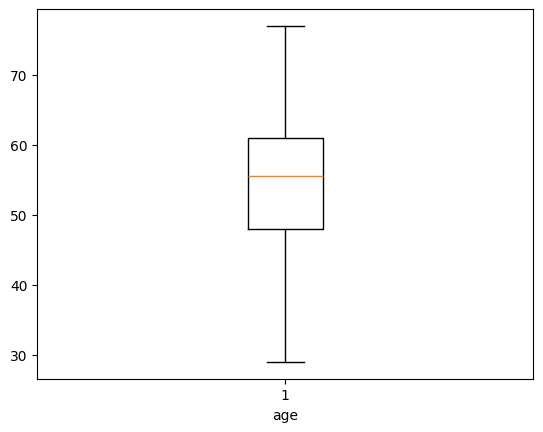

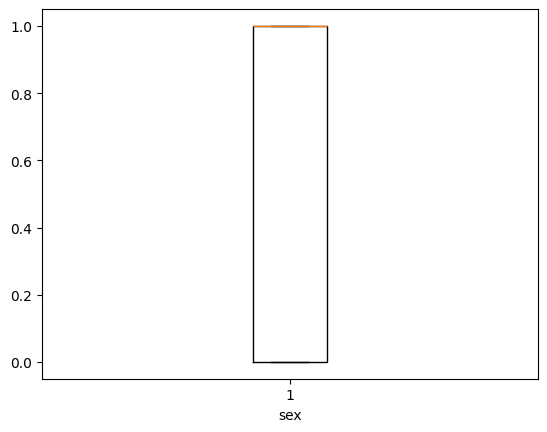

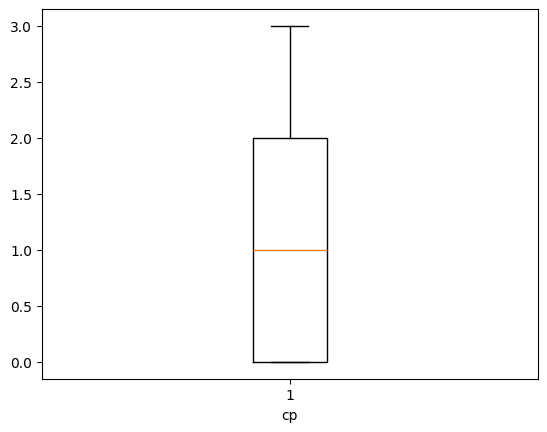

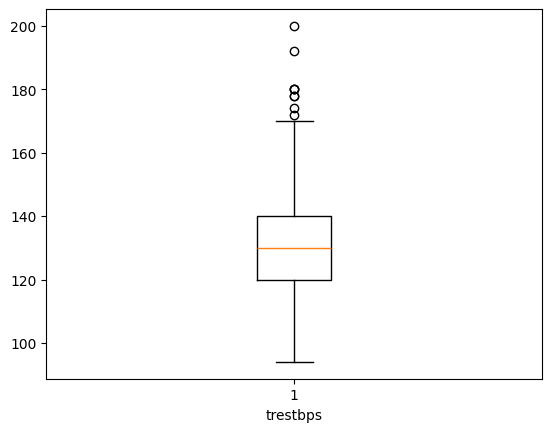

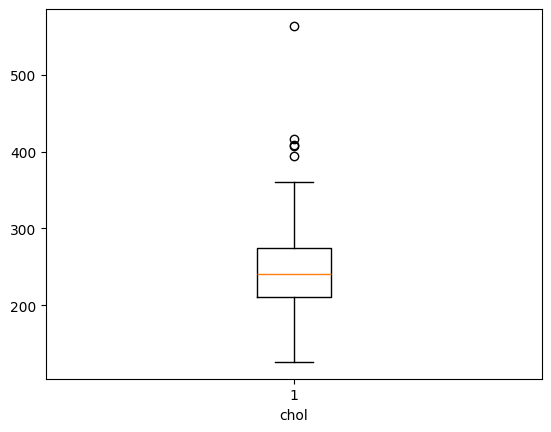

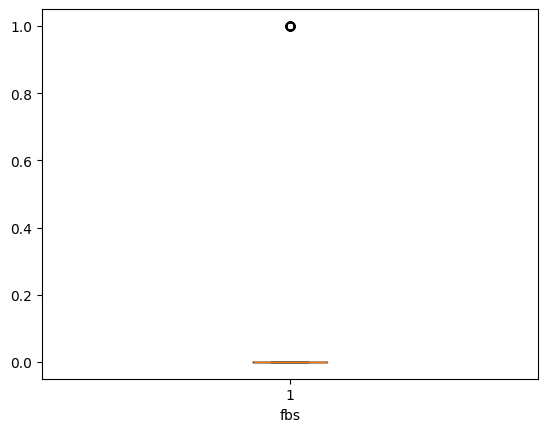

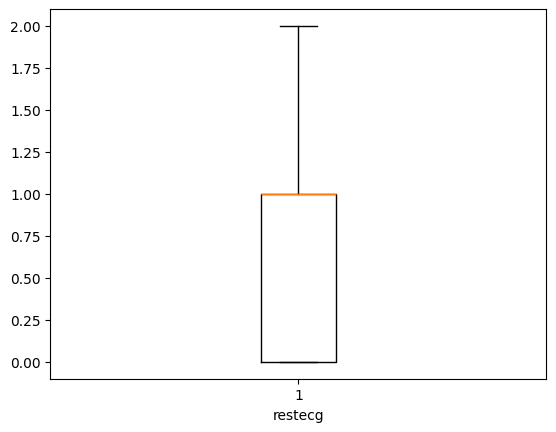

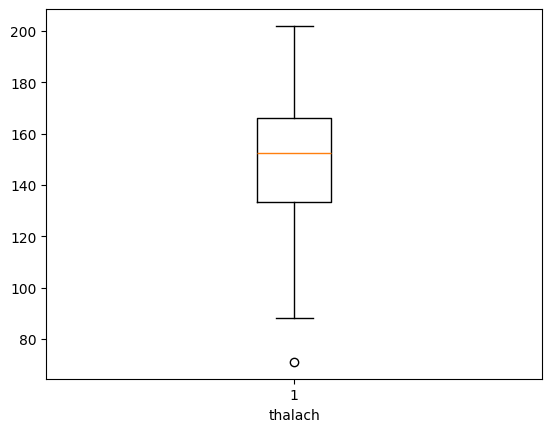

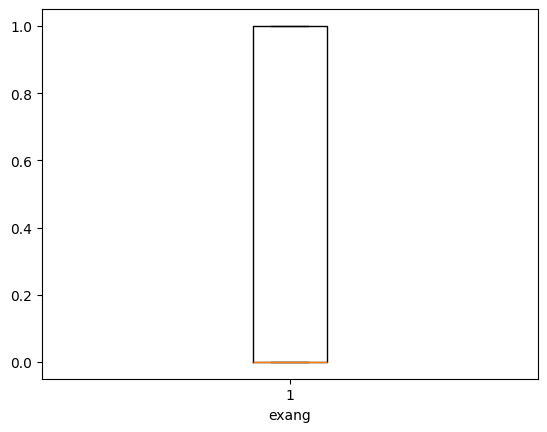

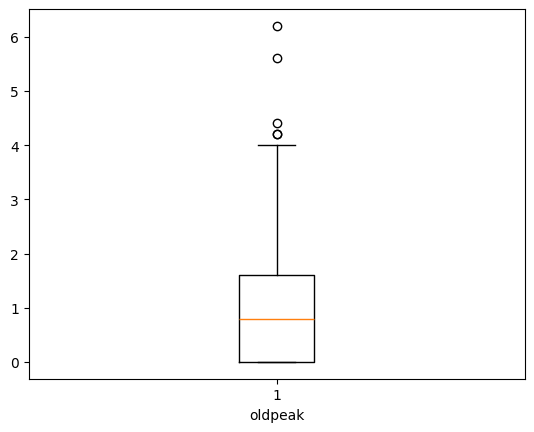

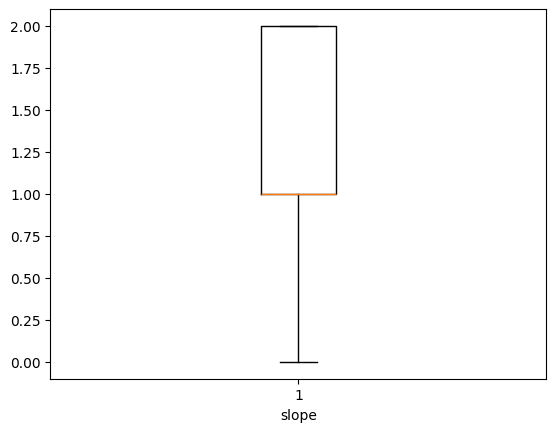

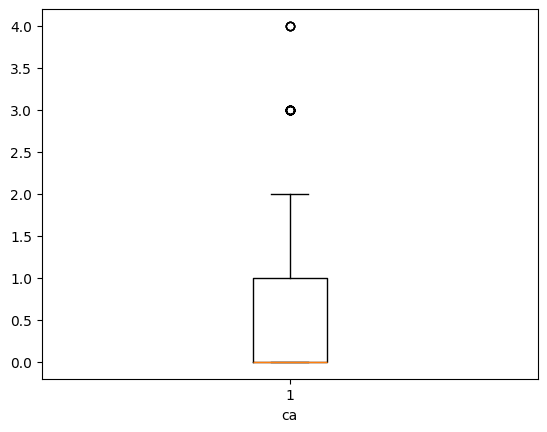

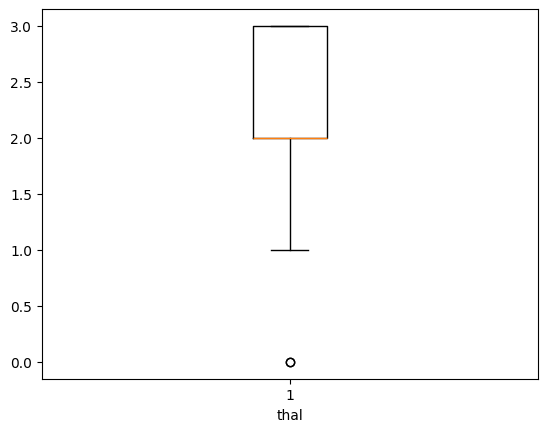

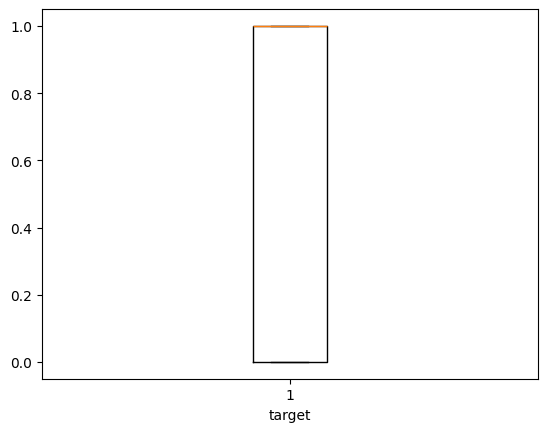

In [45]:
for i in col:
  if (df[i].dtypes=='int64' or df[i].dtypes=='float64'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

As tree algortihms don't have much impact of outliers then we can skip outlier removal part.

In [46]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [47]:
# divide the data into independent and dependent variables
x=df.drop(columns=['target'])
y=df['target']

In [48]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [49]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [52]:
y_train

,target
132,1
203,0
197,0
75,1
177,0
...,...
189,0
71,1
106,1
271,0


In [53]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [54]:
y_test

,target
180,0
229,0
111,1
247,0
60,1
...,...
250,0
104,1
300,0
194,0


In [55]:
model=DecisionTreeClassifier()

In [56]:
# Train the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
# Test the model
y_pred=model.predict(x_test)

In [58]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [59]:
new_df=pd.DataFrame()
new_df['ActualValue']=y_test
new_df['Predicted_Value']=y_pred
new_df

,ActualValue,Predicted_Value
180,0,0
229,0,0
111,1,1
247,0,1
60,1,1
...,...,...
250,0,0
104,1,1
300,0,0
194,0,0


In [60]:
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7868852459016393

In [61]:
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 9, 23]])

In [62]:
#Precision ,Recall
'''
    TN       FP
    FN       TP


Precision=TP/TP+FP
         =22/22+3
         =22/25
         =0.88

Recall=TP/TP+FN
      =22/22+10
      =22/32
      =0.68
'''


'\n    TN       FP\n    FN       TP\n\n\nPrecision=TP/TP+FP\n         =22/22+3\n         =22/25\n         =0.88\n\nRecall=TP/TP+FN\n      =22/22+10\n      =22/32\n      =0.68\n'

In [63]:
precision_score(y_test,y_pred)

0.8518518518518519

In [64]:
recall_score(y_test,y_pred)

0.71875

[Text(0.5851063829787234, 0.9583333333333334, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.3351063829787234, 0.875, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.4601063829787234, 0.9166666666666667, 'True  '),
 Text(0.2127659574468085, 0.7916666666666666, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.1276595744680851, 0.7083333333333334, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.06382978723404255, 0.625, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.0425531914893617, 0.5416666666666666, 'x[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.02127659574468085, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.06382978723404255, 0.4583333333333333, 'x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0425531914893617, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0851063829787234, 0.375, 'gini = 0

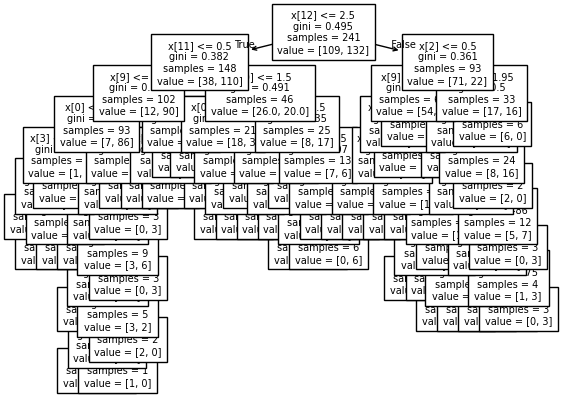

In [65]:
tree.plot_tree(model,fontsize=7)

In [66]:
model.get_depth()

11

**Testing different different max depth to increase accuracy**

In [67]:
depths=[1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in depths:
  model=DecisionTreeClassifier(max_depth=i,random_state=42)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print('Max depth:',i,"Accuracy Score",acc)

Max depth: 1 Accuracy Score 0.7213114754098361
Max depth: 2 Accuracy Score 0.7377049180327869
Max depth: 3 Accuracy Score 0.7868852459016393
Max depth: 4 Accuracy Score 0.8032786885245902
Max depth: 5 Accuracy Score 0.8032786885245902
Max depth: 6 Accuracy Score 0.7704918032786885
Max depth: 7 Accuracy Score 0.7704918032786885
Max depth: 8 Accuracy Score 0.7868852459016393
Max depth: 9 Accuracy Score 0.7704918032786885
Max depth: 10 Accuracy Score 0.7868852459016393
Max depth: 11 Accuracy Score 0.7704918032786885
Max depth: 12 Accuracy Score 0.7704918032786885
Max depth: 13 Accuracy Score 0.7704918032786885


In [68]:
model.get_depth()

11

In [74]:
model=DecisionTreeClassifier(max_depth=4,random_state=42)

In [75]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [76]:
y_pred=model.predict(x_test)

In [77]:
accuracy_score(y_pred,y_test)

0.8032786885245902

# **Hyperparameters**:

Hyperparaters are the settings or controls you choose before training your machine learning model.

1) max_depth:How deep the tree can grow.

if you set max_depth=2,your tree can only make 2 levels of decisions before it stops.

2) min_sample_split:This decides the minimum number of data points a node must have before it can split further.

ex:if a node has only 3 data points and min_sample split=4
the tree says-very less sample we cant split it.

3)min_sample_leaf:The minimum number of data points that must be present in each leaf nodeof the tree.

ex:if we say min-sample_leaf=2 it means i can't make a leaf with only 1 sample i will stop splitting earlier.



# **Grid Search CV**:

It helps us to find the best combination of these hyperparametres.

ex:It tries all the possible combinations like
max_depth=2 or 3 min_sample_split= 2 or 4 ,min_sample_leaf=1or2,
and checks which one gives the best accuracy using the cross validation.

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
new_model=DecisionTreeClassifier()

In [89]:
grid_params={
    'criterion':['gini','entropy'],
    'random_state':[0,1,2,3,4,5],
    'max_depth':[1,2,5,10,50],
    'min_samples_split':[2,6,8,3,9,5,22],
    'min_samples_leaf':[1,4,6,7,9]
}
#criterion:Decides how to split the tree
#max_depth:How deep the tree can grow
#min_sample_split:Minimum data points needed to split a node
#min_sample_leaf:minimum number of data points required in a leaf node.

In [90]:
gv=GridSearchCV(estimator=new_model,param_grid=grid_params,cv=3)

In [91]:
gv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 4, 6, 7, 9],
                         'min_samples_split': [2, 6, 8, 3, 9, 5, 22],
                         'random_state': [0, 1, 2, 3, 4, 5]})

In [92]:
gv.best_params_   #Return the best parameters for your model

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 22,
 'random_state': 0}

In [94]:
dt_model=gv.best_estimator_   #Create a model with these best parameter and so our model will get best accuracy

In [95]:
y_pred=dt_model.predict(x_test)

In [96]:
accuracy_score(y_pred,y_test)

0.8032786885245902

In [97]:
precision_score(y_test,y_pred)

0.9166666666666666

[Text(0.5789473684210527, 0.9166666666666666, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.3684210526315789, 0.75, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.4736842105263158, 0.8333333333333333, 'True  '),
 Text(0.2631578947368421, 0.5833333333333334, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.21052631578947367, 0.4166666666666667, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.10526315789473684, 0.25, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(0.3157894736842105, 0.25, 'x[0] <= 64.5\ngini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.2631578947368421, 0.08333333333333333, 'gini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.3684210526315789, 0.08333333333333333

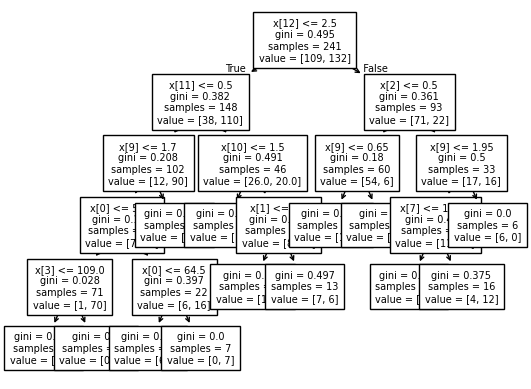

In [98]:
tree.plot_tree(dt_model,fontsize=7)